## Default of Credit Card Clients

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
try:
    _=os.listdir('./output/EDA/')
except:
    os.mkdir('./output/EDA/')
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1)
df_original =df_original.rename({'PAY_0' : 'PAY_1','default payment next month':'default'},axis=1)
df = df_original.copy()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 exact payment ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10

BILL_AMT i : Billing for ith past month

PAY_AMT i : payment for BILL AMT i+1


In [2]:
df = df_train

In [3]:
df_usage = pd.DataFrame()
df_usage['ID']=df.ID
BILL = [column for column in df.columns if 'BILL' in column]
PAY = [column for column in df.columns if 'PAY_AMT' in column]
for i in range(5):
    df_usage[f"USAGE_{i+1}"] = df[BILL[i]]-(df[BILL[i+1]]-df[PAY[i]])


print(BILL+PAY)
df_difference =pd.DataFrame()
df_difference['ID'] = df.ID
for i in range(5):
    df_difference[f"DIFF_{i}"] = df[BILL[i+1]]-df[PAY[i]]
df = pd.concat([df,df_usage.iloc[:,1:],df_difference.iloc[:,1:]],axis=1)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Logarithmic Scaling attribute (for BILLING and PAY_amount) total 12

In [4]:
df[(abs(df)>0) & (1>abs(df))].sum()

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
USAGE_1      0.0
USAGE_2      0.0
USAGE_3      0.0
USAGE_4      0.0
USAGE_5      0.0
DIFF_0       0.0
DIFF_1       0.0
DIFF_2       0.0
DIFF_3       0.0
DIFF_4       0.0
dtype: float64

In [5]:
def log_pre (x):
    return np.log(1+2*abs(x))*np.sign(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))
USAGE = [column for column in df_usage.columns if column !='ID']
DIFF = [column for column in df_difference.columns if column !='ID']
LIM = ['LIMIT_BAL']
df_log =pd.concat([df.ID,df[LIM+BILL+PAY+USAGE+DIFF].apply(log_pre_col,axis=0)],axis=1) #apply(function,axis=) map of those who use index/column as a index
rename_dict = {}
for i in df_log.iloc[:,1:].columns:
    rename_dict[i] = 'log_'+i
df_log =df_log.rename(rename_dict,axis=1)


In [6]:
df_log.columns

Index(['ID', 'log_LIMIT_BAL', 'log_BILL_AMT1', 'log_BILL_AMT2',
       'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6',
       'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4',
       'log_PAY_AMT5', 'log_PAY_AMT6', 'log_USAGE_1', 'log_USAGE_2',
       'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5', 'log_DIFF_0', 'log_DIFF_1',
       'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')

In [7]:
import random

In [8]:
rd_nums =[]
for i in range(4):
    rd_nums.append(random.randint(0,1000))
L_PAY = [column for column in df_log.columns if 'log_PAY' in column]
L_BILL = [column for column in df_log.columns if 'log_BILL' in column]
L_USAGE =  [column for column in df_log.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in df_log.columns if 'log_DIFF' in column]
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
print(D_PAY)

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [9]:
df_original.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [10]:
len(L_PAY+L_BILL+L_USAGE+L_DIFF)

22

In [11]:
rd_nums

[362, 599, 83, 118]

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'USAGE_1', 'USAGE_2', 'USAGE_3', 'USAGE_4', 'USAGE_5', 'DIFF_0',
       'DIFF_1', 'DIFF_2', 'DIFF_3', 'DIFF_4'],
      dtype='object')

In [13]:
columns =['LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'USAGE_1', 'USAGE_2', 'USAGE_3', 'USAGE_4', 'USAGE_5', 'DIFF_0',
       'DIFF_1', 'DIFF_2', 'DIFF_3', 'DIFF_4']

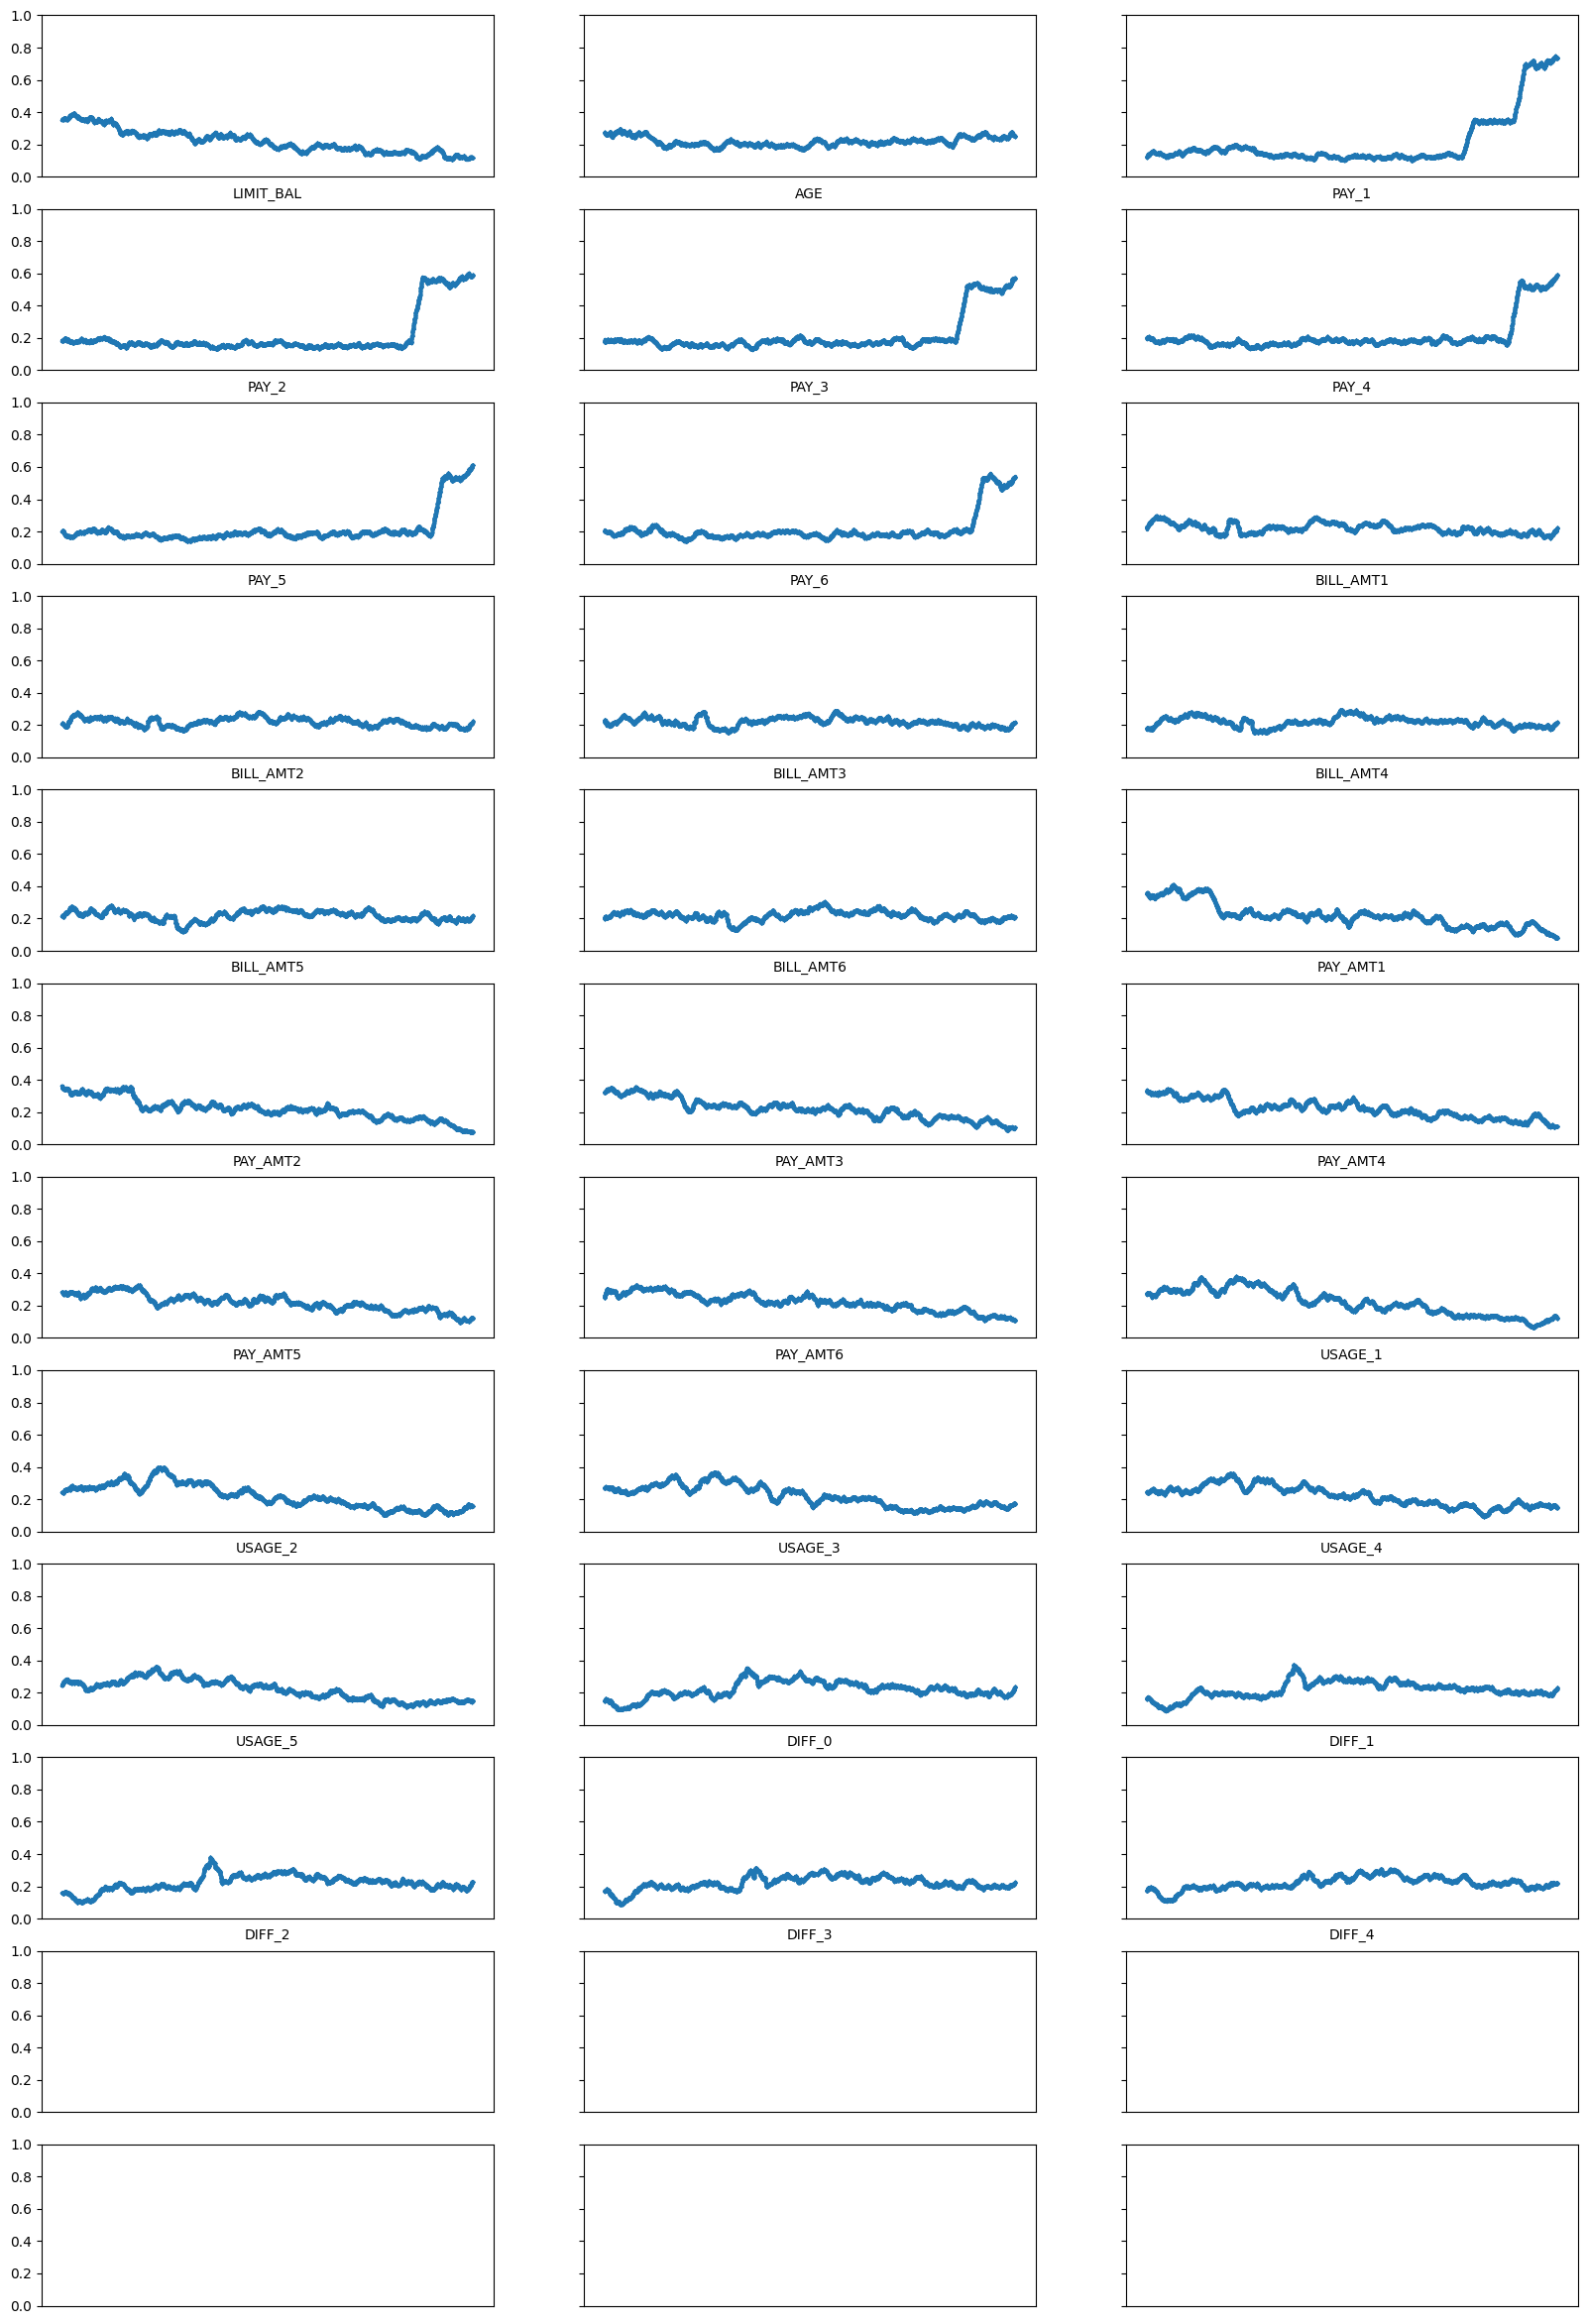

In [14]:
fig, axes = plt.subplots(12,3,sharex=True,sharey=True,figsize=(20,30))
for i,col in enumerate(columns):
    temp = pd.DataFrame({col:df[col].to_numpy(),'default':df['default'].to_numpy()})
    temp = temp.sort_values(col)
    temp.reset_index(inplace=True)
    axes[i//3,i%3].scatter(temp.index, temp.default.rolling(600).mean(),s=2)
    axes[i//3,i%3].set_xlabel(col)
    axes[i//3,i%3].set_ylim((0,1))
    axes[i//3,i%3].set_xticks([])
plt.savefig('./output/EDA/rolling_raw.png',dpi=300)
plt.show()
plt.close()

In [15]:
df_log.columns

Index(['ID', 'log_LIMIT_BAL', 'log_BILL_AMT1', 'log_BILL_AMT2',
       'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6',
       'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4',
       'log_PAY_AMT5', 'log_PAY_AMT6', 'log_USAGE_1', 'log_USAGE_2',
       'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5', 'log_DIFF_0', 'log_DIFF_1',
       'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')

In [16]:
columns= ['log_LIMIT_BAL', 'log_BILL_AMT1', 'log_BILL_AMT2',
       'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6',
       'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4',
       'log_PAY_AMT5', 'log_PAY_AMT6', 'log_USAGE_1', 'log_USAGE_2',
       'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5', 'log_DIFF_0', 'log_DIFF_1',
       'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4']

In [17]:
df_log_ = pd.concat([df['default'],df_log],axis=1)

In [18]:
df_log_

,default,ID,log_LIMIT_BAL,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,...,log_USAGE_1,log_USAGE_2,log_USAGE_3,log_USAGE_4,log_USAGE_5,log_DIFF_0,log_DIFF_1,log_DIFF_2,log_DIFF_3,log_DIFF_4
20349,0,20350,11.982935,11.970357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.970357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,0,6984,13.304687,6.434547,7.415175,6.111467,0.000000,0.000000,0.000000,7.417580,...,6.440947,7.415175,6.111467,0.000000,0.000000,-1.609438,0.000000,0.000000,0.000000,0.000000
17548,1,17549,11.695255,11.528927,11.532346,11.549730,11.548457,10.430669,10.451349,8.294300,...,8.203304,7.788626,7.983781,11.169519,7.164720,11.492325,11.508405,11.521062,10.394610,10.391791
954,0,955,12.301387,8.480737,8.367068,8.371705,8.142936,12.279244,12.282483,8.367068,...,8.480737,8.367068,8.371705,8.142936,9.138092,0.000000,0.000000,0.000000,0.000000,12.235054
12866,0,12867,10.596660,10.606362,10.578394,10.445725,10.257905,10.517348,10.231243,7.920447,...,8.260234,8.871084,8.826294,8.176673,9.253687,10.505752,10.378323,10.225100,10.124669,10.185240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,0,22067,12.676079,8.579041,8.951440,9.972034,9.761636,9.063811,8.579041,8.951440,...,8.579041,8.951440,8.710290,9.095939,8.579041,0.000000,0.000000,9.639196,9.040382,8.107419
19277,0,19278,11.982935,8.604288,8.119399,7.032624,11.722611,11.666187,11.666187,8.119399,...,8.604288,8.119399,7.032624,8.819813,0.000000,0.000000,0.000000,0.000000,11.666187,11.666187
23975,0,23976,10.596660,10.885360,9.932901,9.880065,9.775484,9.842091,9.527266,7.783641,...,10.468602,8.529319,8.689633,6.670766,8.865170,9.809012,9.650980,9.517604,9.729670,9.369820
12381,1,12382,13.815512,0.000000,7.155396,11.059189,11.360601,8.502891,8.530109,7.155396,...,0.000000,7.158514,11.309915,12.159730,8.502891,0.000000,-1.609438,-9.803833,-11.562411,0.000000


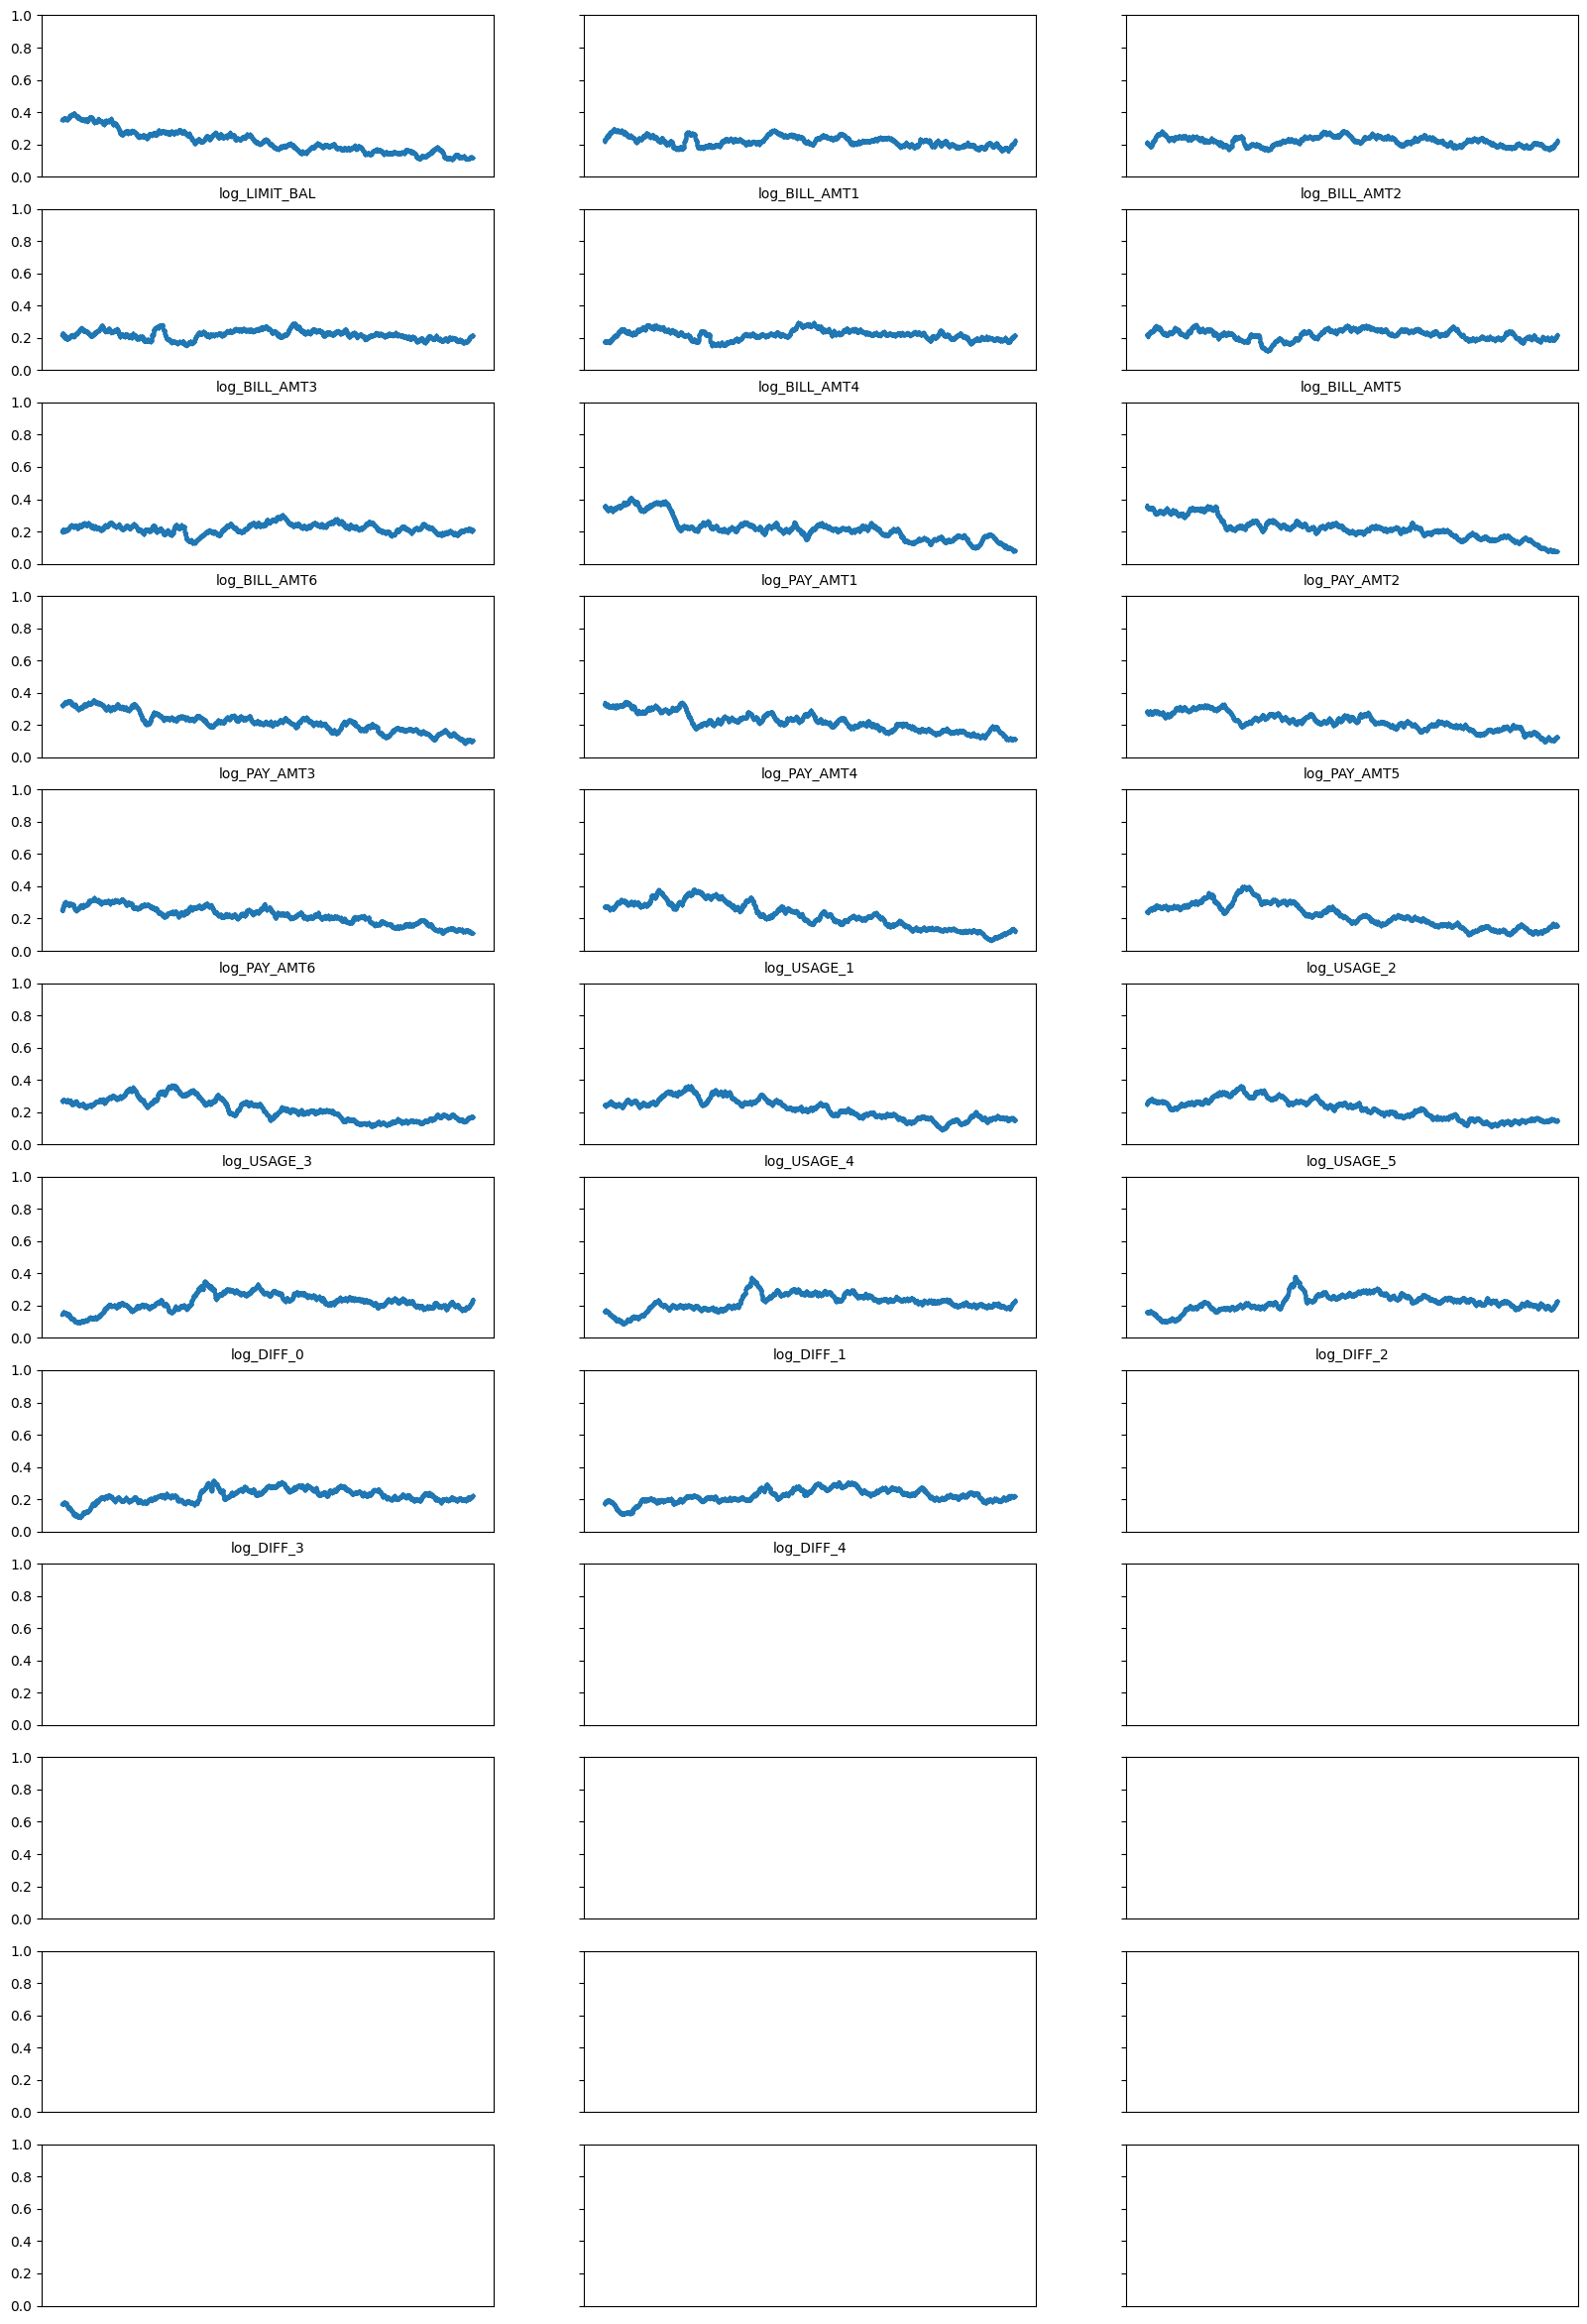

In [19]:
fig, axes = plt.subplots(12,3,sharex=True,sharey=True,figsize=(20,30))
for i,col in enumerate(columns):
    temp = pd.DataFrame({col:df_log_[col].to_numpy(),'default':df_log_['default'].to_numpy()})
    temp = temp.sort_values(col)
    temp.reset_index(inplace=True)
    axes[i//3,i%3].scatter(temp.index, temp.default.rolling(600).mean(),s=2)
    axes[i//3,i%3].set_xlabel(col)
    axes[i//3,i%3].set_ylim((0,1))
    axes[i//3,i%3].set_xticks([])
plt.savefig('./output/EDA/rolling_log.png',dpi=300)
plt.show()
plt.close()

In [20]:
sns.lineplot(X)
plt.ylim(0,1)

NameError: name 'sns' is not defined

In [ ]:
import seaborn as sns

<AxesSubplot: xlabel='AGE', ylabel='Count'>

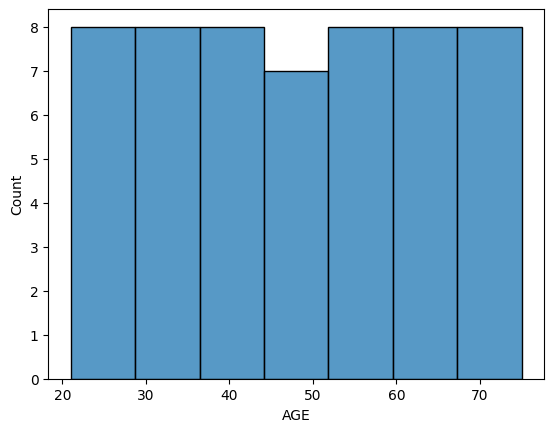

In [ ]:
sns.plot(X,x='AGE',y)

In [ ]:
X

AGE
21    0.207547
22    0.294258
23    0.260372
24    0.272182
25    0.258889
26    0.194206
27    0.206100
28    0.205965
29    0.196921
30    0.203291
31    0.193946
32    0.192841
33    0.187209
34    0.201595
35    0.201711
36    0.224852
37    0.217114
38    0.207521
39    0.215714
40    0.223404
41    0.214634
42    0.225649
43    0.228106
44    0.236398
45    0.191983
46    0.259434
47    0.234375
48    0.240000
49    0.269697
50    0.250804
51    0.234127
52    0.255507
53    0.241525
54    0.222222
55    0.294118
56    0.238095
57    0.210000
58    0.247312
59    0.321429
60    0.360000
61    0.333333
62    0.121212
63    0.217391
64    0.269231
65    0.222222
66    0.250000
67    0.272727
68    0.250000
69    0.214286
70    0.125000
71    0.000000
72    0.500000
73    0.500000
74    0.000000
75    0.500000
Name: default, dtype: float64

In [ ]:
    X =df.groupby('AGE').mean().default

In [ ]:
df.AGE.value_counts()

29    1234
27    1082
28    1073
30    1033
26     932
25     900
31     892
34     878
32     866
33     860
36     845
24     834
35     818
37     783
38     718
39     700
23     699
40     658
42     616
41     615
44     533
43     491
45     474
46     424
22     418
47     384
48     350
49     330
50     311
51     252
53     236
52     227
54     198
55     153
56     126
57     100
58      93
59      56
21      53
60      50
61      42
62      33
64      26
63      23
65      18
66      16
69      14
67      11
70       8
68       4
71       3
75       2
72       2
73       2
74       1
Name: AGE, dtype: int64

In [ ]:
X =df.AGE.unique()

array([25, 51, 48, 46, 38, 41, 34, 39, 45, 35, 24, 53, 28, 42, 54, 29, 31,
       37, 36, 47, 30, 49, 27, 55, 44, 26, 40, 23, 22, 33, 50, 43, 32, 52,
       59, 58, 56, 57, 62, 65, 66, 21, 61, 67, 60, 64, 69, 74, 68, 63, 70,
       75, 71, 72, 73])

In [ ]:
df.default.loc[]

20349    0
6983     0
17548    1
954      0
12866    0
        ..
22066    0
19277    0
23975    0
12381    1
26237    0
Name: default, Length: 22500, dtype: int64

In [ ]:
y = df.default

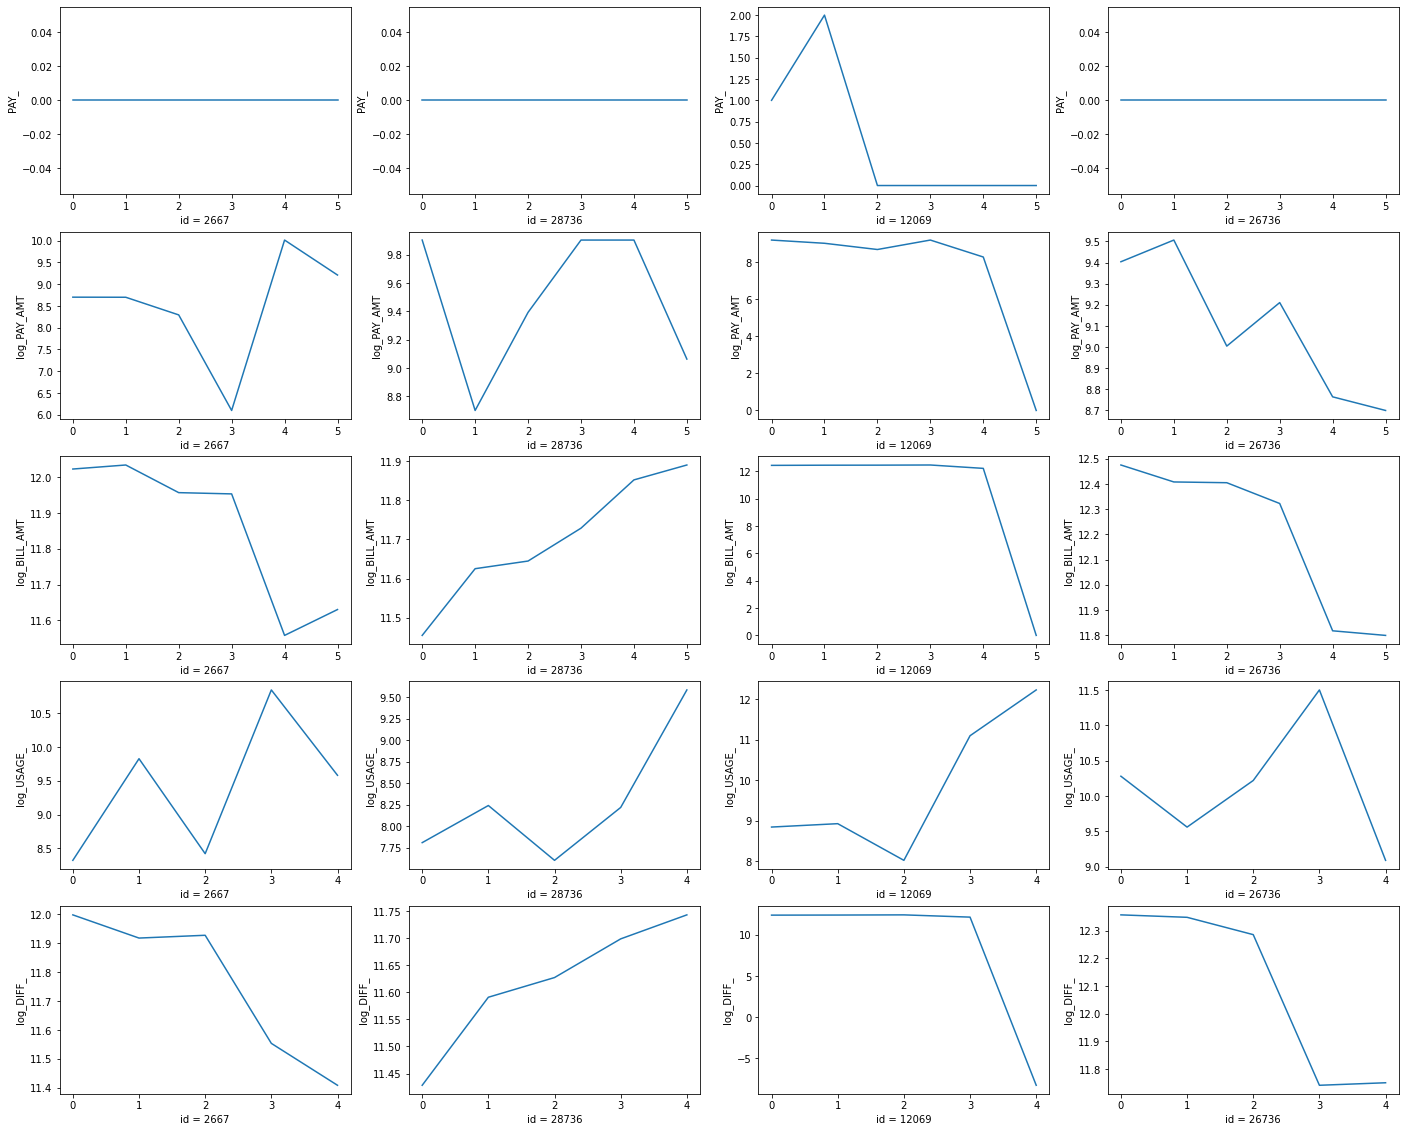

In [ ]:
fig, axes = plt.subplots(5,4, clear=True,figsize=(24,20))
for j,rd_num in enumerate(rd_nums):
    for i, cat in enumerate([D_PAY,L_PAY,L_BILL,L_USAGE,L_DIFF]):
        try:
            axes[i,j].plot(range(5),df.iloc[rd_num][cat])
            axes[i,j].set_xticks(range(5))
        except:
            axes[i,j].plot(range(6),df.iloc[rd_num][cat])
        axes[i,j].set_ylabel(cat[0][:-1])
        axes[i,j].set_xlabel(f'id = {int(df.iloc[rd_num]["ID"])}')

plt.show()
    


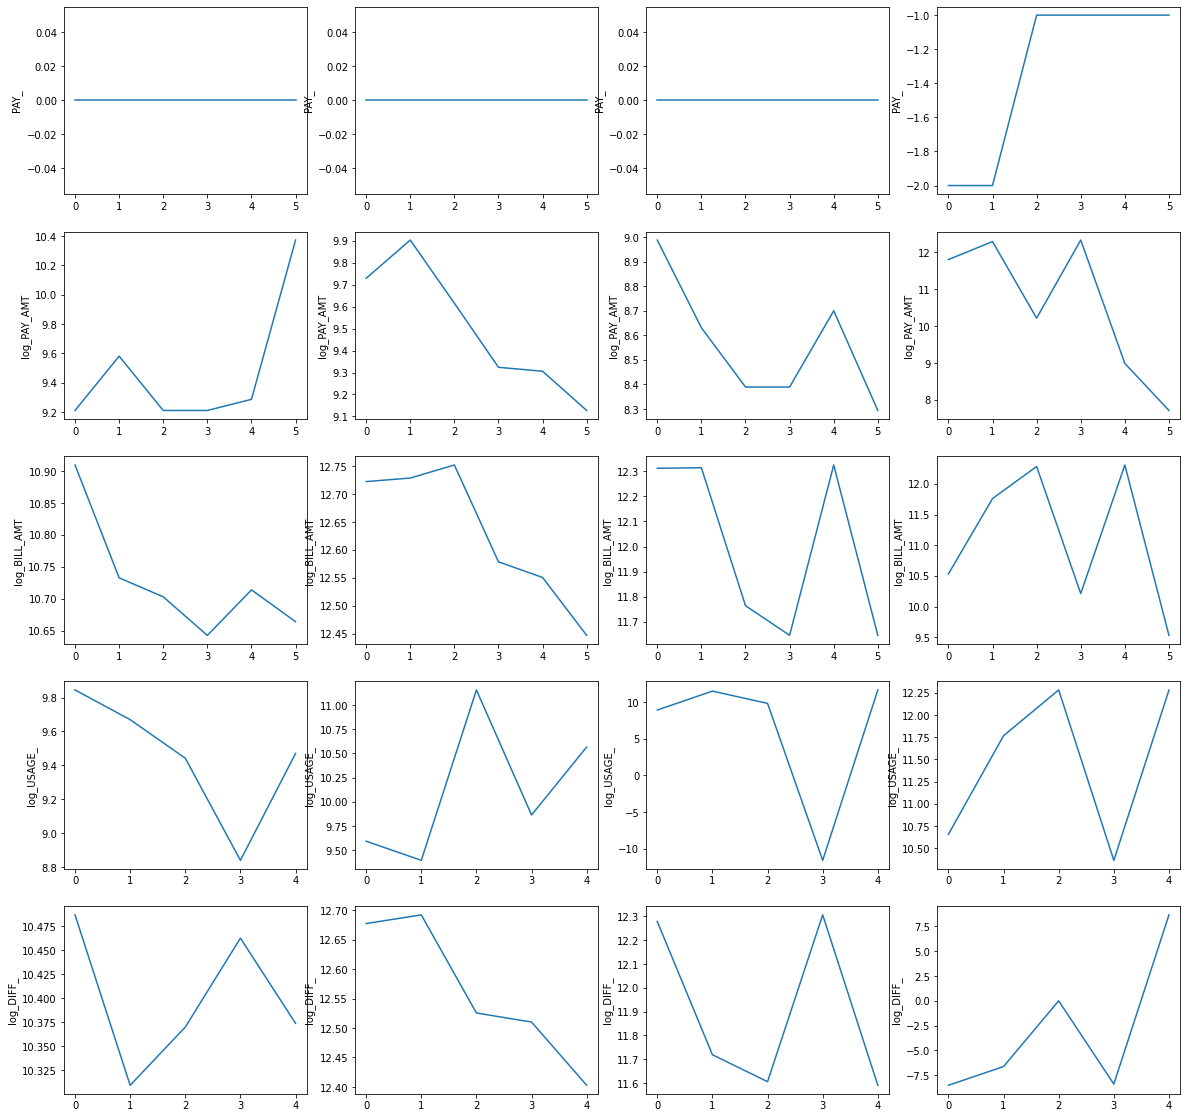

In [ ]:
fig, axes = plt.subplots(5,4, clear=True,figsize=(20,20))
for j,rd_num in enumerate(rd_nums):
    for i, cat in enumerate([D_PAY,L_PAY,L_BILL,L_USAGE,L_DIFF]):
        try:
            axes[i,j].plot(range(5),df.iloc[rd_num][cat])
        except:
            axes[i,j].plot(range(6),df.iloc[rd_num][cat])
        axes[i,j].set_ylabel(cat[0][:-1])

plt.show()
    


In [ ]:
df[L_PAY].apply(lambda x:x.std() ,axis=1).describe()

count    22500.000000
mean         2.109022
std          1.770042
min          0.000000
25%          0.377146
50%          1.460694
75%          3.806098
max          6.511297
dtype: float64

In [ ]:
df[L_PAY].iloc[3].std()

1.5555596660880062

In [ ]:
df[L_PAY].describe()

,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,7.209421,7.135657,6.850356,6.626342,6.556734,6.471591
std,3.493802,3.528114,3.612315,3.663293,3.725414,3.802474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.601402,7.438972,6.675823,6.398595,6.178979,5.629413
50%,8.343554,8.299783,8.202756,8.006701,8.006701,8.006701
75%,9.211040,9.210440,9.112507,8.988883,8.988071,8.987322
max,14.373471,15.029984,14.398888,14.032234,13.636361,13.871260


In [ ]:
from pyts.multivariate.transformation import MultivariateTransformer
from pyts.transformation import BagOfPatterns as BOP
from sklearn.base import TransformerMixin, BaseEstimator
class my_mbop(BaseEstimator,TransformerMixin):
    def __init__(self,estimator,flatten=True, channel_list=None):
        #time stamp of channel must be same size
        #ex: USAGE and DIFF has size 5 instead of 6
        self.channel_list = channel_list
        self.transformer = MultivariateTransformer(estimator,flatten)
        self.version = 1
    def fit(self,X, y=None):
        if self.channel_list != None:
            sample_size,_ =X.shape
            _,channel_length =X[self.channel_list[0]].shape
            new_X = np.zeros((sample_size,len(self.channel_list),channel_length))
            for i,channel in enumerate(self.channel_list):
                new_X[:,i,:] = X[channel]
        self.transformer.fit(new_X,y=None)
        return self
    def transform(self,X,y=None):
        if self.channel_list != None:
            sample_size,_ =X.shape
            _,channel_length =X[self.channel_list[0]].shape
            new_X = np.zeros((sample_size,len(self.channel_list),channel_length))
            for i,channel in enumerate(self.channel_list):
                new_X[:,i,:] = X[channel]
        return self.transformer.transform(new_X)
    
    

In [ ]:
transformer = my_mbop(BOP(window_size=3,word_size=1.0,n_bins=4,
                          strategy='quantile',
                          ),channel_list=[L_USAGE])
print(transformer.channel_list)
x =transformer.fit_transform(df)
print(x.shape)

[['log_USAGE_1', 'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5']]
(22500, 42)
